<a href="https://colab.research.google.com/github/Alshappipa1/Example1/blob/master/Copy_of_MNIST_CNN_HelloWorld_DLinColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare the workspace - load Keras, Tensorflow

In [69]:
from __future__ import print_function
import keras
from keras import utils
from keras.utils import plot_model
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt

# Import the MNIST dataset + create variables for our test and training data

In [70]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# CNN specific shape of the data

In [71]:
# input image dimensions of MNIST data
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# Preprocess the data
Note we do not shape it into a 1D vector of size 28*28 = 784 here, but rather keep the images as 28 x 28 x 1 to be used with 2D convolution layer.

Compare this preprocessing steps in the code MNIST_HelloWorld_DLinR code!

In [72]:
# rescale
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
60000 train samples
10000 test samples


## The y data is an integer vector with values ranging from 0 to 9.  To prepare this data for training we one-hot encode the vectors into binary class matrices

In [73]:
# One hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

y_train shape: (60000, 10)
y_test shape: (10000, 10)


# Build the model
Building the neural network requires configuring the layers of the model then compiling the model.

# Setup the layers

In [ ]:
#CNN with the one layer

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))

model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

In [ ]:
#CNN with the 3 layers

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))
#Second convolutional layer
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu'))
#The max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))


In [74]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))
#Second convolutional layer
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu'))
#The max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Print the details of the model

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_26 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 12, 12, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_26 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_13 (Flatten)        (None, 9216)              0         
                                                                 
 dense_26 (Dense)            (None, 128)               1179776   
                                                     

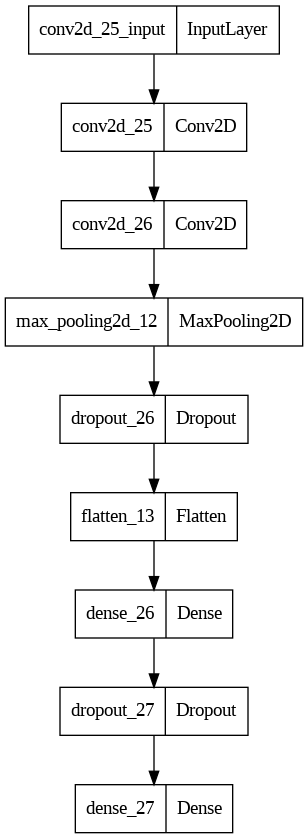

In [75]:
#keras.utils.print_summary(model)
model.summary()
# You can also plot instead
keras.utils.plot_model(model)

# Compile the model - define loss and optimizer

In [ ]:
model.compile(
  loss= 'categorical_crossentropy',
  optimizer= 'adam',
  metrics='accuracy'
  )

# Train the model

In [ ]:
history = model.fit(
  x_train, y_train,
  #epochs=5, batch_size=128,
  epochs=30, batch_size=128,
  validation_split=0.2
)

Epoch 1/30
375/375 [==============================] - 4s 9ms/step - loss: 0.0063 - accuracy: 0.9979 - val_loss: 0.0459 - val_accuracy: 0.9922
Epoch 2/30
375/375 [==============================] - 3s 9ms/step - loss: 0.0066 - accuracy: 0.9977 - val_loss: 0.0449 - val_accuracy: 0.9918
Epoch 3/30
375/375 [==============================] - 4s 10ms/step - loss: 0.0071 - accuracy: 0.9974 - val_loss: 0.0505 - val_accuracy: 0.9903
Epoch 4/30
375/375 [==============================] - 3s 9ms/step - loss: 0.0081 - accuracy: 0.9973 - val_loss: 0.0403 - val_accuracy: 0.9919
Epoch 5/30
375/375 [==============================] - 3s 9ms/step - loss: 0.0060 - accuracy: 0.9980 - val_loss: 0.0459 - val_accuracy: 0.9920
Epoch 6/30
375/375 [==============================] - 3s 9ms/step - loss: 0.0063 - accuracy: 0.9979 - val_loss: 0.0485 - val_accuracy: 0.9927
Epoch 7/30
375/375 [==============================] - 4s 10ms/step - loss: 0.0067 - accuracy: 0.9979 - val_loss: 0.0475 - val_accuracy: 0.9912
Epoc

## The history object returned by fit() includes loss and accuracy metrics which we can plot

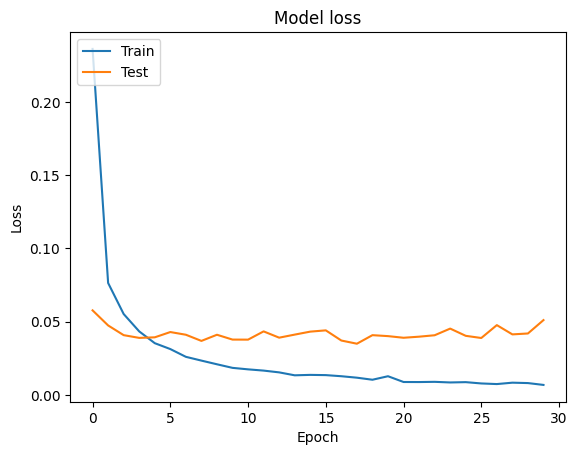

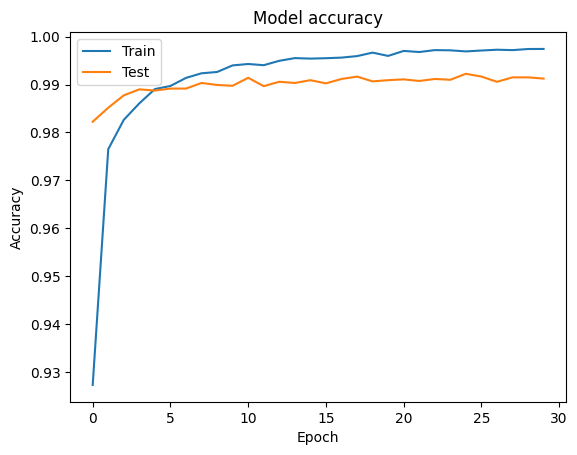

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### evaulating result

In [ ]:
#Test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04367596283555031
Test accuracy: 0.9916999936103821


In [ ]:
#Train accuracy
score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.010624408721923828
Train accuracy: 0.9981666803359985


# Project 3
## Add two layers after the initial convolutional layer in "Setup the layers" above
1. Convolutional layer with kernel size 3 x 3 with relu
2. Maxpool layer with size 2 x 2
### Submit the code chunk below
It should be of the form:

---
```
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))
model.add(Your convolutional layer here!)
model.add(Your maxpool layer here!)
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
```
---

## Make sure you ran the full code with these two additional layers added, and report the final training accuracy value, test accuracy value.


In [ ]:
# Enter your code chunk here
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))
# model.add(Your convolutional layer here!)
# model.add(Your maxpool layer here!)
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))